In [1]:
import torch
import fastai

from Quick.cleaning.loading import (
    examine_dataset
)

from Quick.cleaning.utils import (
    get_file_path
)

from Quick.runners.deep import (
    run_deep_nn_experiment
)

from Quick.runners.residual import (
    run_residual_deep_nn_experiment
)

from Quick.runners.sk import (
    run_sk_experiment
)

from Quick.runners.torch import (
    run_torch_nn_experiment
)

from Quick.constants import *

In [2]:
DATASET

'Dataset'

In [3]:
data_path_1: str = './data/'
data_sets_1: list = [
    'Darknet_experiments_base.csv'
]

file_path_1: callable = get_file_path(data_path_1)
file_set_1: list = list(map(file_path_1, data_sets_1))
current_job: int = 0

dataset_1 = examine_dataset(0, file_set_1, data_sets_1)

Dataset 0/1: We now look at ./data/Darknet_experiments_base.csv


Loading Dataset: ./data/Darknet_experiments_base.csv
	To Dataset Cache: ./cache/Darknet_experiments_base.csv.pickle


        File:				./data/Darknet_experiments_base.csv  
        Job Number:			0
        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    


In [4]:
dataset_1 = examine_dataset(0, file_set_1, data_sets_1) 

Dataset 0/1: We now look at ./data/Darknet_experiments_base.csv


Loading Dataset: ./data/Darknet_experiments_base.csv
	To Dataset Cache: ./cache/Darknet_experiments_base.csv.pickle


        File:				./data/Darknet_experiments_base.csv  
        Job Number:			0
        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    


In [5]:
dataset_1['Dataset'].head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Application Type
0,6,119384497,767,2027,90681,2448831,543,0,118.228162,224.244409,...,65535,65535,166,20,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
1,6,119754701,1021,2537,171290,2922270,1460,0,167.766895,280.092409,...,65535,65535,292,20,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
2,6,118908117,683,1662,77649,2001627,543,0,113.688141,221.086482,...,65535,65535,142,20,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
3,6,739728,2,2,543,543,543,0,271.500000,383.958982,...,41180,65535,0,20,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming
4,6,149270,2,2,565,565,565,0,282.500000,399.515331,...,41180,65535,0,20,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming


Shape of Input Data: (117620, 63)


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0.712908,0.689295,0.783200,0.535341,0.918142,0.695882,0.557426,0.605824,0.535341,00:20
1,0.667232,0.640632,0.787494,0.554515,0.926586,0.706904,0.567889,0.600274,0.554515,00:24
2,0.591875,0.618187,0.810661,0.583828,0.937233,0.741892,0.584530,0.628830,0.583828,00:21
3,0.549051,0.642459,0.733846,0.567807,0.939289,0.655581,0.594925,0.716461,0.567807,00:22
4,0.516840,0.604799,0.761478,0.586678,0.941216,0.677220,0.608900,0.747797,0.586678,00:22
5,0.500914,0.615720,0.743454,0.595280,0.946767,0.672048,0.622797,0.730756,0.595280,00:21
6,0.468131,0.549417,0.778567,0.634431,0.953682,0.708773,0.670401,0.776284,0.634431,00:23
7,0.450200,0.479101,0.848580,0.689573,0.962717,0.791551,0.724233,0.783261,0.689573,00:22
8,0.454497,0.507660,0.847347,0.686770,0.959985,0.789111,0.721686,0.781110,0.686770,00:21
9,0.431457,0.527704,0.797653,0.604802,0.955996,0.723714,0.633861,0.760110,0.604802,00:22


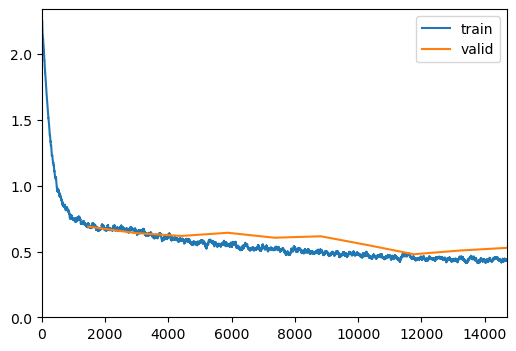

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5277036428451538, accuracy:  79.77%


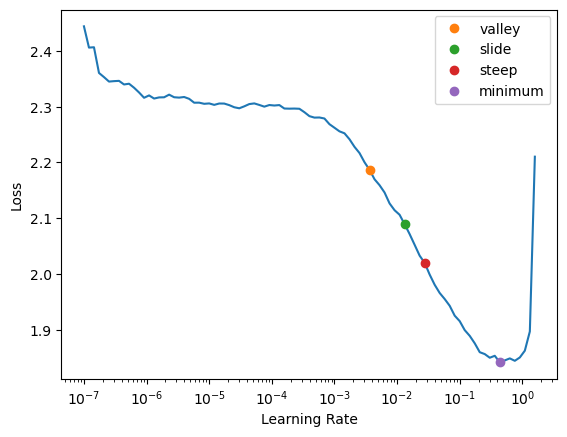

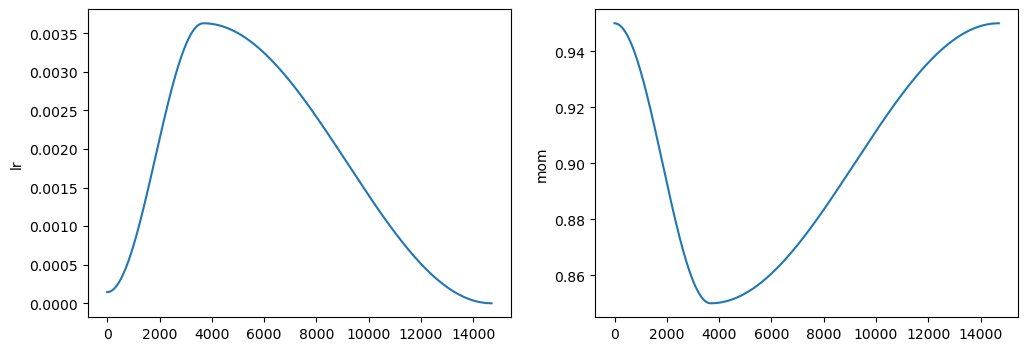

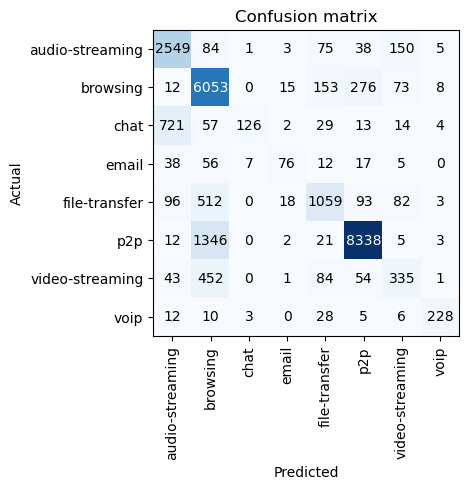

In [6]:
results = run_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(50 for _ in range(10)))

Shape of Input Data: (117620, 63)
Layer sizes: [64, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 8], length: 22
Number of residual blocks: 19
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0.854241,0.890956,0.743666,0.516292,0.870541,0.640480,0.533053,0.565544,0.516292,01:57
1,0.653448,0.680540,0.791277,0.571773,0.924750,0.709148,0.591982,0.633021,0.571773,02:21
2,0.598407,0.601801,0.801819,0.589533,0.935355,0.724057,0.615936,0.691352,0.589533,01:45
3,0.588282,0.606104,0.801522,0.585112,0.935857,0.721363,0.626019,0.739749,0.585112,01:47
4,0.531491,0.564559,0.801777,0.612723,0.946738,0.722759,0.642760,0.701317,0.612723,02:59
5,0.526015,0.526387,0.819588,0.633651,0.951632,0.749634,0.662653,0.715937,0.633651,01:40
6,0.505346,0.546486,0.820396,0.628784,0.951809,0.750445,0.658381,0.729111,0.628784,01:41
7,0.505572,0.538655,0.818653,0.623585,0.952419,0.747577,0.655383,0.731430,0.623585,01:38
8,0.503748,0.506712,0.826390,0.640411,0.955842,0.758791,0.671875,0.736646,0.640411,02:20
9,0.498144,0.508082,0.826135,0.636491,0.955817,0.759169,0.667474,0.740431,0.636491,01:43


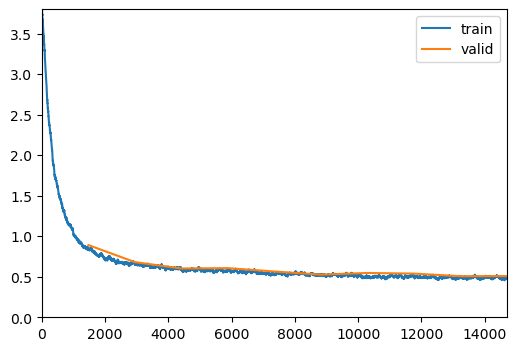

loss: 0.5080823302268982, accuracy:  82.61%


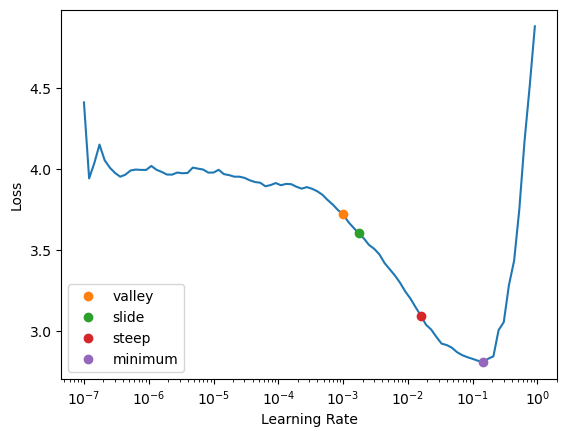

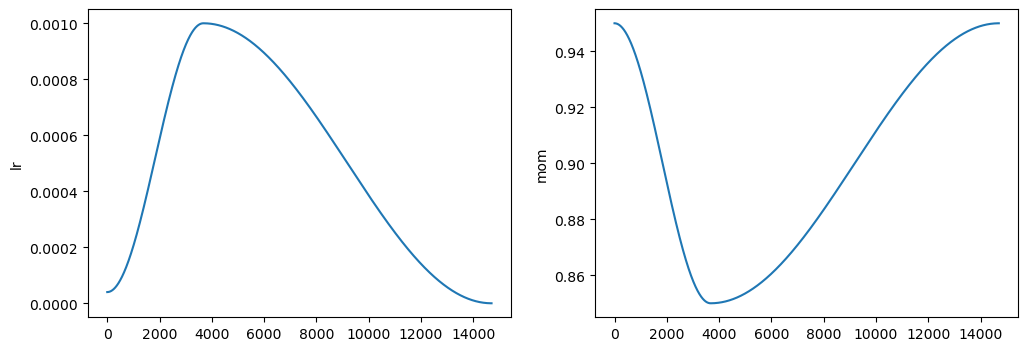

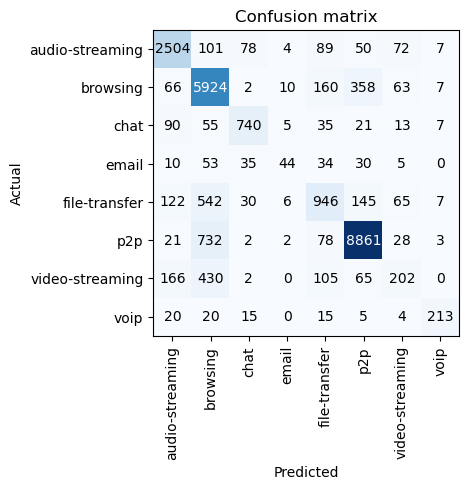

In [8]:
results_res = run_residual_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (100 for _ in range(20)))

In [6]:
results_sk = run_sk_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type')

Shape of Input Data: (117620, 63)
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2905
           1       0.84      0.91      0.87      6590
           2       0.91      0.84      0.88       966
           3       0.76      0.67      0.71       211
           4       0.78      0.67      0.72      1863
           5       0.96      0.96      0.96      9727
           6       0.69      0.52      0.59       970
           7       0.96      0.92      0.94       292

    accuracy                           0.89     23524
   macro avg       0.85      0.80      0.82     23524
weighted avg       0.89      0.89      0.89     23524

	Accuracy: 0.8920251657881313



In [6]:
import torch.nn as nn
from fastai.tabular.all import LinBnDrop
from fastai.layers import Identity

class BottleneckResidualBlock(nn.ModuleList):
# class BottleneckResidualBlock(Module):
    '''
        A residule block that creates a skip connection around a set of n branches
            where the number of branches is determined by the number of input modules
            in the branches list parameter.

            the residual connection is put through a linear batchnormed layer if the
            input size is different from the output size
            Then, the output of the branches is summed together along with the possibly transformed input
    '''
    def __init__(self, branches: list, layer: int, in_size: int, out_size: int):
        super().__init__(branches)
        
        self.branches = branches
        self.layer = layer

        self.in_size = in_size
        self.out_size = out_size

        if(in_size != out_size):
            # self.identity_path = nn.Linear(in_size, out_size)
            # self.identity_path = BnReluLin(in_size, out_size)
            self.identity_path = LinBnDrop(in_size, out_size)
        else:
            self.identity_path = Identity()


    def forward(self, inputs):

        fx = self.branches[0](inputs)
        for i in range(len(self.branches) - 1):
            fx += self.branches[i + 1](inputs)

        if(inputs.shape != fx.shape):
            inputs = self.identity_path(inputs)
        return fx + inputs



class Simple_Resnet_Model(nn.Module):
    def __init__(self, input_features=62, layers=[100 for _ in range(20)], output_features=8, config: dict = None):
        super().__init__()
        self._layers = []
        _activations = [nn.ReLU(inplace=True) for _ in range(len(layers) - 1)] + [None]

        for i, x in enumerate(layers):
            print(i)
            if (i == 0):
                print(f'i = {i} == 0')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(input_features, layers[i+1], act=_activations[i], lin_first=True)], i, input_features, layers[i+1]))
            elif (i == len(layers) - 1):
                print(f'i = {i} == {len(layers) - 1}')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, output_features, act=_activations[i], lin_first=True)], i, x, output_features))
                # self._layers.append(LinBnDrop(x, output_features, act=_activations[i], lin_first=True))
            else:
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, layers[i+1], act=_activations[i], lin_first=True)], i, x, layers[i+1]))
        
        self.out = nn.Sequential(*self._layers)     
        
    def forward(self, x):
        return self.out(x)


Shape of Input Data: (117620, 63)
0
i = 0 == 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
i = 19 == 19


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0.621680,0.645749,0.808578,0.597794,0.942740,0.736581,0.618352,0.679054,0.597794,01:46
1,0.543277,0.617549,0.827495,0.629697,0.954101,0.759640,0.658484,0.739996,0.629697,02:01
2,0.489764,0.538136,0.831364,0.654916,0.960532,0.769089,0.688522,0.781075,0.654916,02:11
3,0.460808,0.469910,0.839611,0.684035,0.965090,0.781613,0.710515,0.756182,0.684035,02:08
4,0.435898,0.459341,0.848793,0.691097,0.968385,0.793972,0.724440,0.782287,0.691097,01:53
5,0.423904,0.529428,0.783073,0.677630,0.961876,0.708386,0.700838,0.746768,0.677630,01:48
6,0.383987,0.535661,0.850366,0.711024,0.968146,0.796116,0.739757,0.786372,0.711024,01:48
7,0.386063,0.455461,0.849133,0.721496,0.972213,0.792950,0.754183,0.801018,0.721496,01:58
8,0.387745,0.488732,0.836890,0.721623,0.970296,0.777216,0.748944,0.788917,0.721623,02:27
9,0.370122,0.415679,0.861376,0.733400,0.974036,0.809693,0.760590,0.799078,0.733400,02:04


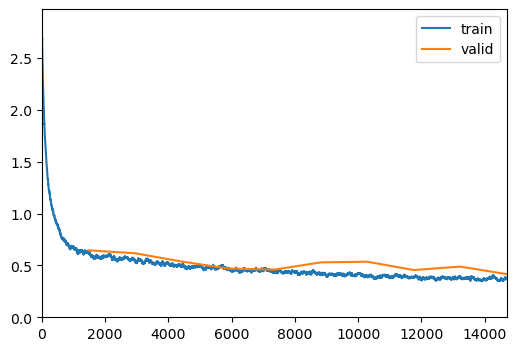

loss: 0.41567859053611755, accuracy:  86.14%


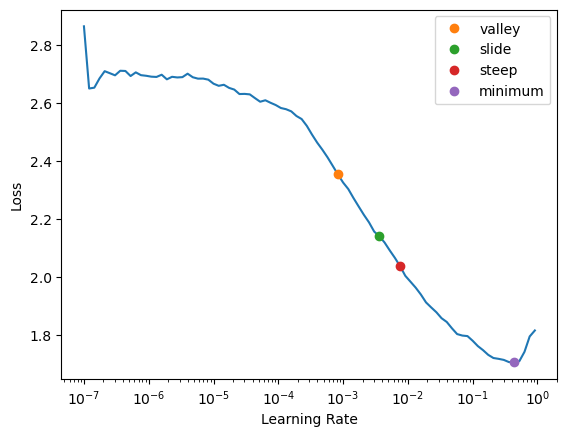

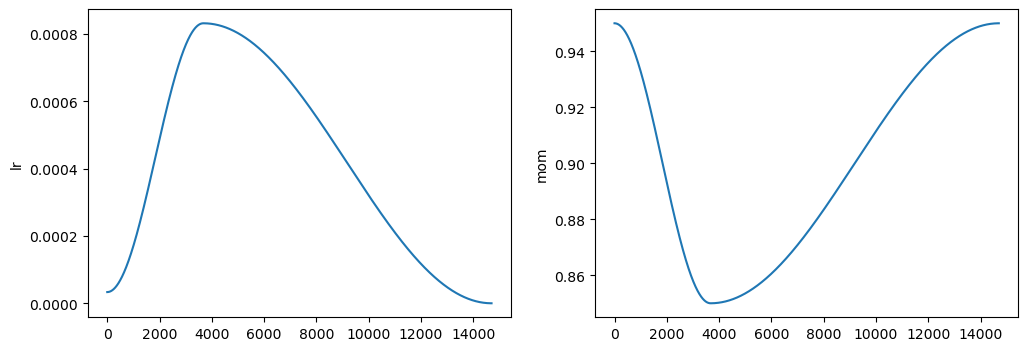

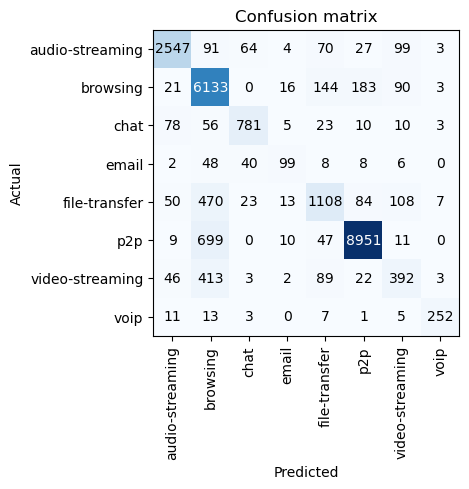

In [7]:
results_t_res = run_torch_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Resnet_Model)

In [ ]:
dataset_1['Dataset'].columns

In [11]:
torch.device('mps')

device(type='mps')

Shape of Input Data: (117620, 63)


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0.716225,0.672944,0.783115,0.520458,0.915729,0.700991,0.527056,0.549637,0.520458,00:16
1,0.671824,0.747524,0.712464,0.514309,0.921968,0.622081,0.515415,0.571669,0.514309,00:17
2,0.596016,0.582298,0.812999,0.589536,0.935520,0.742350,0.605220,0.640429,0.589536,00:16
3,0.558363,0.575695,0.817591,0.582812,0.947578,0.752394,0.600550,0.748885,0.582812,00:18
4,0.538290,0.719488,0.692187,0.466582,0.927841,0.585532,0.472531,0.555546,0.466582,00:21
5,0.511732,0.568320,0.813552,0.569340,0.951566,0.744652,0.599403,0.695920,0.569340,00:24
6,0.484208,0.725778,0.702729,0.530904,0.923610,0.607741,0.527519,0.610346,0.530904,00:35
7,0.476641,0.551268,0.798929,0.660600,0.959726,0.731121,0.693727,0.748440,0.660600,00:35
8,0.449583,0.539676,0.824987,0.685347,0.961775,0.761195,0.715869,0.763644,0.685347,00:24
9,0.444223,0.514974,0.844924,0.698881,0.962944,0.788235,0.729359,0.776475,0.698881,00:31


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


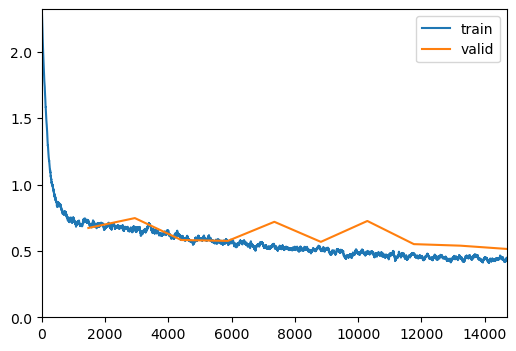

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5149742960929871, accuracy:  84.49%


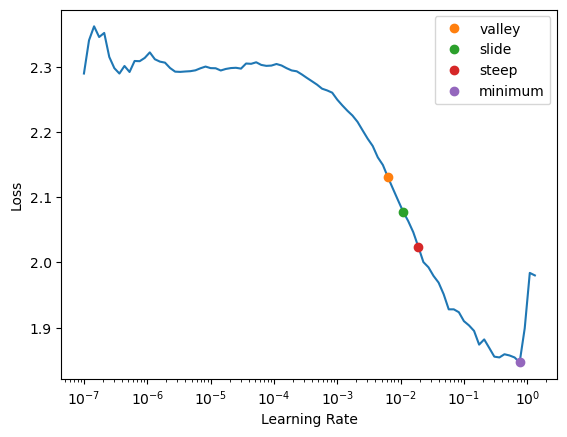

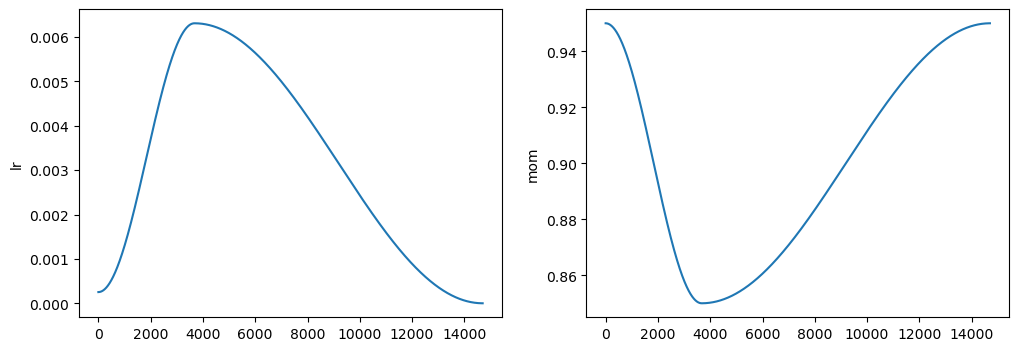

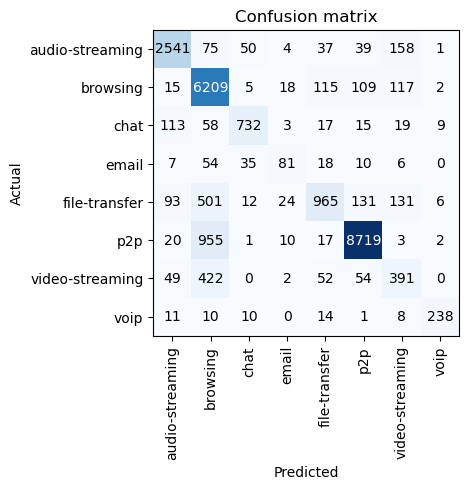

In [12]:
results = run_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(50 for _ in range(10)))


Shape of Input Data: (117620, 63)
Layer sizes: [64, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 8], length: 12
Number of residual blocks: 9
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0.698764,0.719012,0.775038,0.520142,0.903766,0.684900,0.547736,0.639100,0.520142,00:16
1,0.625879,0.635338,0.783583,0.569550,0.925718,0.695205,0.596716,0.662180,0.569550,00:15
2,0.579938,0.618988,0.793743,0.577227,0.932495,0.709600,0.612458,0.708697,0.577227,00:18
3,0.579420,0.608358,0.802627,0.603330,0.933412,0.725025,0.621797,0.668263,0.603330,00:19
4,0.558259,0.578951,0.815338,0.616951,0.943069,0.747157,0.634362,0.732335,0.616951,00:19
5,0.542242,0.663118,0.796591,0.607682,0.937219,0.714867,0.636973,0.700423,0.607682,00:16
6,0.509880,0.553385,0.823797,0.634531,0.952236,0.755279,0.658817,0.732150,0.634531,00:21
7,0.499994,0.589172,0.818951,0.630956,0.949258,0.748277,0.664026,0.748113,0.630956,00:37
8,0.498001,0.558957,0.827283,0.647292,0.954246,0.761167,0.676108,0.736611,0.647292,00:25
9,0.477488,0.550031,0.821884,0.643637,0.951820,0.752375,0.669979,0.736425,0.643637,00:16


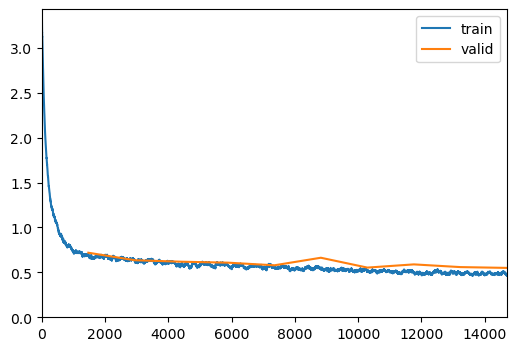

loss: 0.5500311255455017, accuracy:  82.19%


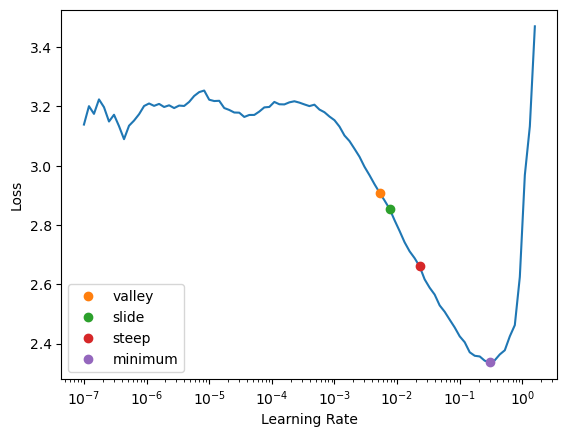

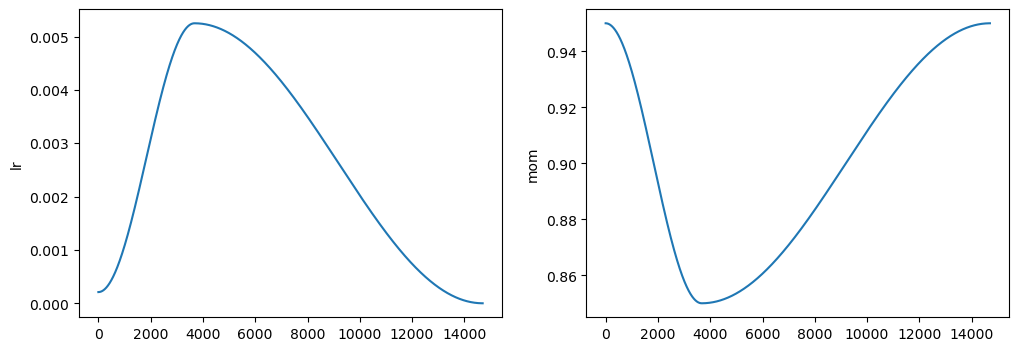

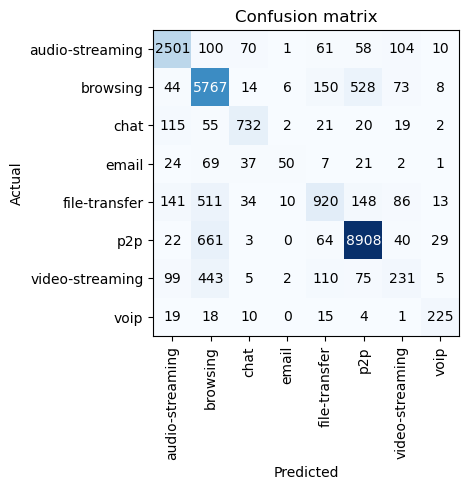

In [13]:
results_res = run_residual_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (50 for _ in range(10)))
